## Using Human Protien Atlas to annotate DX genes

In [1]:
import NotebookImport
import Protein_Atlas as PA

importing IPython notebook from Protein_Atlas

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

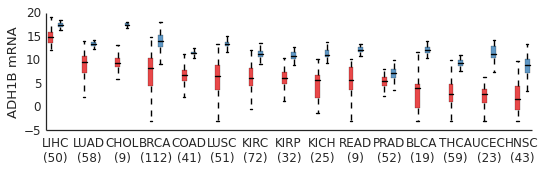

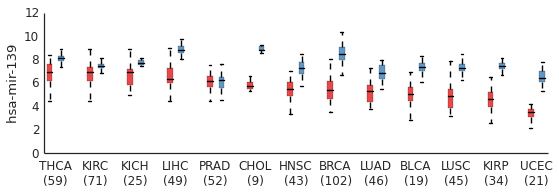

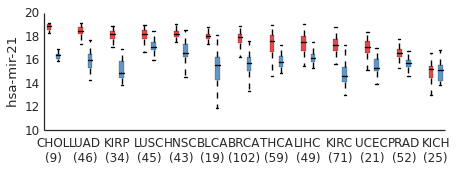

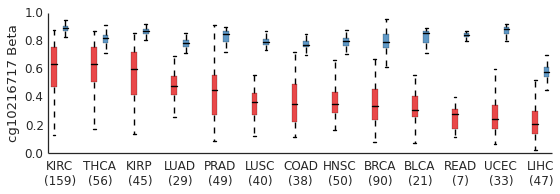

In [2]:
import DX_screen as Screen

In [3]:
from Imports import *

In [4]:
loc = PA.loc.set_index('Gene')
loc = loc['Main location']
loc.index = loc.index.map(lambda s: PA.mapping[s])
loc = loc.dropna()
loc = loc.groupby(level=0).first()

In [5]:
f = Screen.dx_rna.frac

In [6]:
rr = pd.DataFrame({s: anova(loc.dropna().map(lambda v: s in v), f) for 
                   s in ti(loc.value_counts() > 5)}).T
rr.sort('p').head()

,F,p
Endoplasmic reticulum,22.92,1.72e-06
Vesicles,17.69,2.63e-05
Nucleus,16.01,6.36e-05
Plasma membrane,14.92,1.13e-04
Nucleoli,12.87,3.36e-04


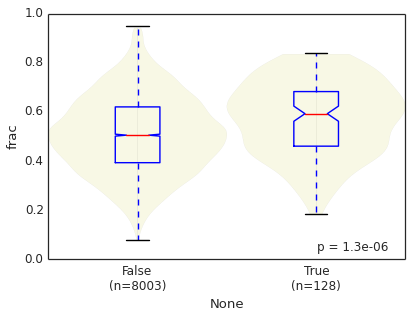

In [7]:
violin_plot_pandas(loc.map(lambda s: 'Endoplasmic reticulum' in s), f)

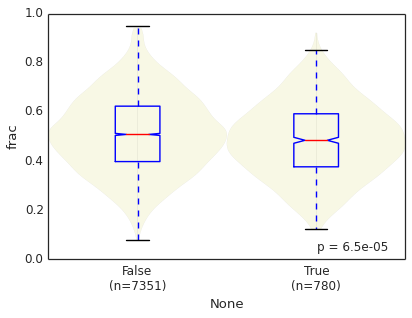

In [8]:
violin_plot_pandas(loc.map(lambda s: 'Vesicles' in s), f)

### Differential Protien Expression

In [9]:
g = ti(PA.mapping == 'FOXM1')[0]

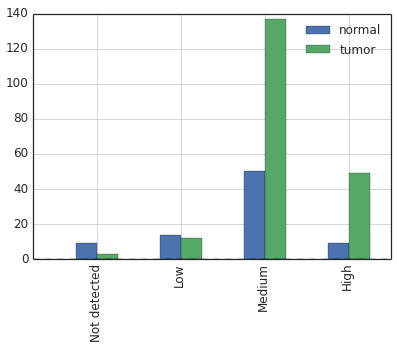

In [10]:
cancer_exp = PA.cancer.ix[g].sum()
normal_df = PA.normals.query('Gene == "{}"'.format(g))
normal_exp = normal_df.Level.value_counts()
d = pd.concat([normal_exp, cancer_exp], keys=['normal','tumor'], axis=1)
o = ['Not detected','Low','Medium','High']
d.ix[o].plot(kind='bar')

In [11]:
tn_map = pd.DataFrame([[k,i[0], i[1]] for k,v in PA.tn_map.iteritems() 
                       for i in v])

In [12]:
c = tn_map.iloc[0]

In [13]:
cat_map = {'Not detected': 0, 'Low': 1, 'Medium': 2, 'High': 3}

In [14]:
df = PA.normals.set_index(['Gene','Tissue','Cell type']).Level.unstack('Gene').T
normal_counts = df.apply(pd.value_counts, 1).fillna(0)
tumor_counts = PA.cancer.groupby(level='Gene').sum()

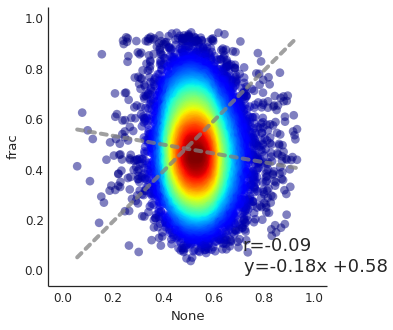

In [15]:
f1 = normal_counts['Not detected'] / normal_counts.sum(1)
f2 = tumor_counts['Not detected'] / tumor_counts.sum(1)
f3 = ((f2 - f1).order() / 2) + .5
f3.index = f3.index.map(lambda s: PA.mapping[s])
f3 = f3.groupby(level=0).first()
plot_regression(f3, Screen.dx_rna.frac, density=True, rad=.1)

In [127]:
b = pd.concat([f3, Screen.dx_rna.frac], axis=1, keys=['a','b']).sort('a').dropna()
b[b.b < .2].head(10)

,a,b
LIFR,0.27,0.14
RASL11A,0.31,0.18
PKNOX2,0.35,0.13
CES1,0.35,0.18
ANAPC16,0.36,0.18
LRRN3,0.37,0.19
XPA,0.37,0.17
C14orf159,0.37,0.15
SCN2B,0.37,0.14
CRBN,0.37,0.15


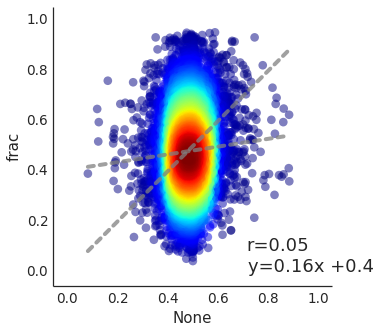

In [128]:
f1 = normal_counts['High'] / normal_counts.sum(1)
f2 = tumor_counts['High'] / tumor_counts.sum(1)
f3 = ((f2 - f1).order() / 2) + .5
f3.index = f3.index.map(lambda s: PA.mapping[s])
f3 = f3.groupby(level=0).first()
plot_regression(f3, Screen.dx_rna.frac, density=True, rad=.1)

In [131]:
b = pd.concat([f3, Screen.dx_rna.frac], axis=1, keys=['a','b']).sort('a').dropna()
b[b.b > .9].tail(10)

,a,b
SPC25,0.54,0.91
FOXM1,0.57,0.95
ANLN,0.58,0.93
CDC20,0.58,0.90
AURKB,0.59,0.91
IQGAP3,0.59,0.95
EZH2,0.66,0.91
MKI67,0.66,0.92
FEN1,0.67,0.92
TOP2A,0.75,0.93


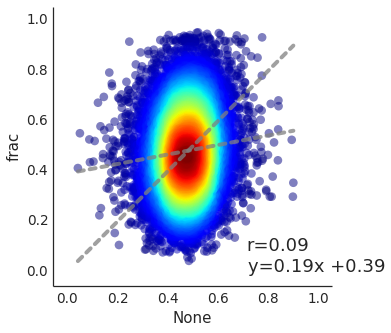

In [132]:
f1 = normal_counts[['Medium','High']].sum(1) / normal_counts.sum(1)
f2 = tumor_counts[['Medium','High']].sum(1) / tumor_counts.sum(1)
f3 = ((f2 - f1).order() / 2) + .5
f3.index = f3.index.map(lambda s: PA.mapping[s])
f3 = f3.groupby(level=0).first()
plot_regression(f3, Screen.dx_rna.frac, density=True, rad=.1)

In [137]:
b = pd.concat([f3, Screen.dx_rna.frac], axis=1, keys=['a','b']).sort('a').dropna()
b[b.b < .2].head(10)

,a,b
CBX7,0.19,0.15
DNASE1L3,0.21,0.11
LRRN3,0.24,0.19
THRB,0.25,0.20
THRA,0.25,0.20
BEX1,0.27,0.19
RNF11,0.28,0.19
TACC1,0.29,0.18
TXNIP,0.31,0.17
PI16,0.31,0.09


In [135]:
b = pd.concat([f3, Screen.dx_rna.frac], axis=1, keys=['a','b']).sort('a').dropna()
b[b.b > .8].tail(10)

,a,b
TYMS,0.69,0.85
PCNA,0.69,0.81
CDC20,0.69,0.90
EZH2,0.69,0.91
TCOF1,0.70,0.82
ANLN,0.70,0.93
ATAD2,0.71,0.88
CDK1,0.73,0.86
KIF4B,0.76,0.85
TOP2A,0.78,0.93


In [138]:
un_vc = lambda vc:  pd.Series([j for i,v in vc.iteritems() if v > 0 for j in [i]*v])

In [151]:
normal_us = normal_counts.apply(un_vc, 1).T
normal_us = normal_us.replace(cat_map)
tumor_us = tumor_counts.apply(un_vc, 1).T
tumor_us = tumor_us.replace(cat_map)

In [365]:
mtest = {}
for g in normal_us.columns:
    try:
        a,b = normal_us[g].dropna(), tumor_us[g].dropna()
        d = pd.concat([a,b], keys=[0,1])
        v = d.groupby(level=0).mean()
        sign = v[0] < v[1]
        r = stats.mannwhitneyu(a, b)
        mtest[g] = (sign, r[1])
    except:
        pass
mtest = pd.DataFrame(mtest).T
mtest = mtest.sort(1)

In [366]:
dd = mtest.join(PA.mapping).set_index('Gene').join(Screen.dx_rna.frac).dropna().sort(1)
dd = dd.groupby(level=0).first()

In [381]:
v = (bhCorrection(dd[1]) < .01) & (dd.frac > .7) & (dd[0] == 1)
v.value_counts()

False    13965
True       208
dtype: int64

In [382]:
rr = screen_feature(v, chi2_cont_test, Screen.gs2.T)
rr.head()

,chi2,p,dof,q
REACTOME_CELL_CYCLE_MITOTIC,104.98,1.23e-24,1,1.02e-21
REACTOME_DNA_STRAND_ELONGATION,91.75,9.82e-22,1,4.08e-19
KEGG_DNA_REPLICATION,84.83,3.26e-20,1,9.04e-18
REACTOME_SYNTHESIS_OF_DNA,79.28,5.39e-19,1,1.02e-16
REACTOME_S_PHASE,79.02,6.14e-19,1,1.02e-16


In [450]:
dd.frac.ix[ti((bhCorrection(dd[1]) < 10e-7) & (dd[0] 
              == 1))].ix[ti(Screen.gs2['REACTOME_TELOMERE_MAINTENANCE']>0)].dropna().order()

HIST1H4C    0.59
HIST1H4D    0.66
HIST1H4I    0.68
HIST1H4H    0.69
HIST2H4A    0.69
HIST1H4A    0.72
HIST1H4E    0.73
HIST1H4J    0.77
LIG1        0.81
PCNA        0.81
FEN1        0.92
Name: frac, dtype: float64

In [454]:
list(Out[450].index)

['HIST1H4C',
 'HIST1H4D',
 'HIST1H4I',
 'HIST1H4H',
 'HIST2H4A',
 'HIST1H4A',
 'HIST1H4E',
 'HIST1H4J',
 'LIG1',
 'PCNA',
 'FEN1']

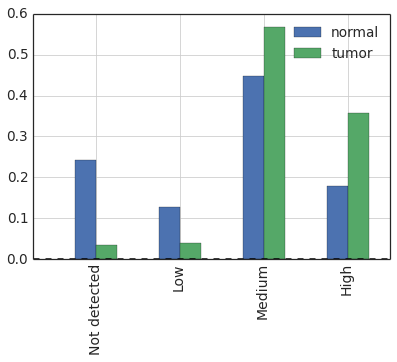

In [451]:
g = ti(PA.mapping == 'HIST1H4J')[0]
cancer_exp = PA.cancer.ix[g].sum()
normal_df = PA.normals.query('Gene == "{}"'.format(g))
normal_exp = normal_df.Level.value_counts()
d = pd.concat([normal_exp, cancer_exp], keys=['normal','tumor'], axis=1)
d = d / d.sum()
o = ['Not detected','Low','Medium','High']
d.ix[o].plot(kind='bar')

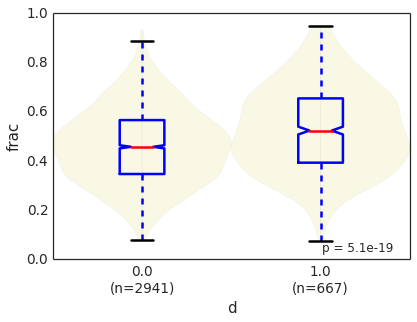

In [439]:
violin_plot_pandas(dd[0], dd.frac.ix[ti((bhCorrection(dd[1]) < 10e-5))])

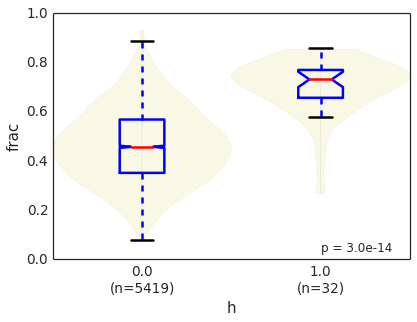

In [432]:
violin_plot_pandas(Screen.gs2['REACTOME_TELOMERE_MAINTENANCE'],
                   dd.frac.ix[ti((bhCorrection(dd[1]) < .01) & (dd[0] == 0))])

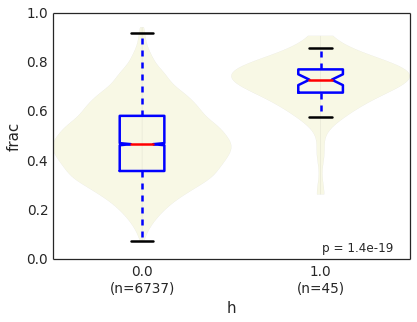

In [312]:
violin_plot_pandas(Screen.gs2['REACTOME_TELOMERE_MAINTENANCE'],
                   dd.frac.ix[ti((bhCorrection(dd[1]) < .01))])

In [402]:
v = (bhCorrection(dd[1]) < .01) & (dd.frac < .25) & (dd[0] == 0)
v.value_counts()

False    13727
True       446
dtype: int64

In [403]:
rr = screen_feature(v.groupby(level=0).first(), chi2_cont_test, Screen.gs2.T)
rr.head()

,chi2,p,dof,q
KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION,27.60,1.49e-07,1,1.24e-04
REACTOME_ETHANOL_OXIDATION,20.74,5.25e-06,1,2.19e-03
REACTOME_PHASE_1_FUNCTIONALIZATION_OF_COMPOUNDS,16.52,4.82e-05,1,1.34e-02
KEGG_TRYPTOPHAN_METABOLISM,11.38,7.42e-04,1,1.54e-01
REACTOME_G_ALPHA_S_SIGNALLING_EVENTS,10.50,1.19e-03,1,1.79e-01


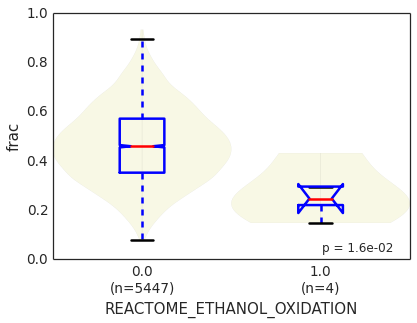

In [408]:
violin_plot_pandas(Screen.gs2['REACTOME_ETHANOL_OXIDATION'],
                   dd.frac.ix[ti((bhCorrection(dd[1]) < .01) & (dd[0] == 0))])

In [316]:
dd[(dd.frac - .5).abs() > .4].sort(1).head(20)

,0,1,frac
TOP2A,2117.5,3.96e-26,0.93
TGFBR3,4385.0,7.77e-20,0.08
GCOM1,4624.0,2.31e-18,0.09
CKAP2L,3300.5,8.01e-16,0.92
CDC20,3880.5,2.86e-14,0.90
EZH2,3918.0,2.60e-13,0.91
NCAPH,4060.0,3.21e-13,0.92
MKI67,4185.0,2.33e-12,0.92
NDRG2,4086.0,5.68e-12,0.09
ANLN,4422.0,3.91e-11,0.93


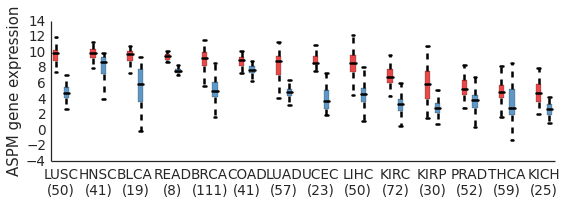

In [331]:
paired_bp_tn_split(Screen.matched_rna.ix['ASPM'], codes)

In [332]:
nn = PA.normals.query('Gene == "{}"'.format(g))
nn.query('Tissue == "lung"')

,Gene,Tissue,Cell type,Level,Reliability
231020,ENSG00000105976,lung,macrophages,High,Uncertain
231021,ENSG00000105976,lung,pneumocytes,Low,Uncertain


In [333]:
PA.cancer.ix[g]

Level,High,Low,Medium,Not detected
Tumor,,,,
breast cancer,0,0,12,0
carcinoid,0,2,2,0
cervical cancer,0,5,6,1
colorectal cancer,1,0,11,0
endometrial cancer,0,0,12,0
glioma,0,5,7,0
head and neck cancer,0,0,4,0
liver cancer,1,0,11,0
lung cancer,1,3,5,1


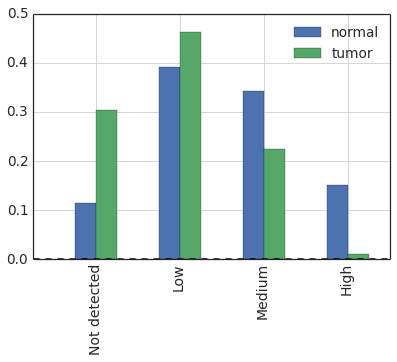

In [334]:
g = ti(PA.mapping == 'ASPM')[0]
cancer_exp = PA.cancer.ix[g].sum()
normal_df = PA.normals.query('Gene == "{}"'.format(g))
normal_exp = normal_df.Level.value_counts()
d = pd.concat([normal_exp, cancer_exp], keys=['normal','tumor'], axis=1)
d = d / d.sum()
o = ['Not detected','Low','Medium','High']
d.ix[o].plot(kind='bar')

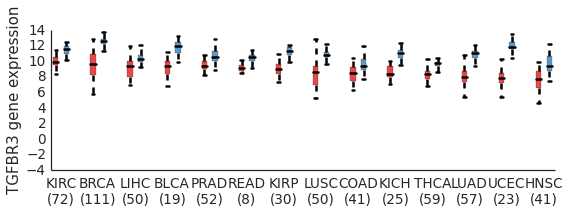

In [317]:
paired_bp_tn_split(Screen.matched_rna.ix['TGFBR3'], codes)

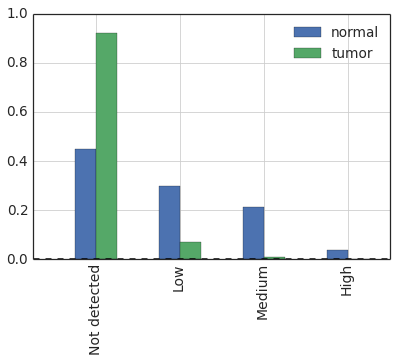

In [318]:
g = ti(PA.mapping == 'TGFBR3')[0]
cancer_exp = PA.cancer.ix[g].sum()
normal_df = PA.normals.query('Gene == "{}"'.format(g))
normal_exp = normal_df.Level.value_counts()
d = pd.concat([normal_exp, cancer_exp], keys=['normal','tumor'], axis=1)
d = d / d.sum()
o = ['Not detected','Low','Medium','High']
d.ix[o].plot(kind='bar')

In [37]:
df = PA.normals.rename(columns=lambda s: s.replace(' ','_'))
df = df.set_index(['Gene','Tissue','Cell_type'])

rr = {}
for g in ti(PA.mapping.isin(Screen.dx_rna.index)):
    try:
        #nn = df.query(('Gene == "{}" & Tissue == "{}" & Cell_type == "{}"'
        #               .format(g, c[1], c[2]))).iloc[0]
        nn = df.ix[(g, c[1], c[2])]
        tt = PA.cancer.ix[(g, c[0])]
        tt = pd.Series([j for i,v in tt.iteritems() if v > 0 for j in [i]*v])
        tt = tt.map(cat_map)
        normal_level = cat_map[nn['Level']]
        v = (normal_level, (tt == normal_level).sum(), 
             (tt > normal_level).sum(), (tt < normal_level).sum())
        rr[PA.mapping[g]] = v
    except:
        pass
rr = pd.DataFrame(rr).T
rr['f'] = rr[2] / (rr[2] + rr[3])
rr = rr.replace(np.inf, 1)

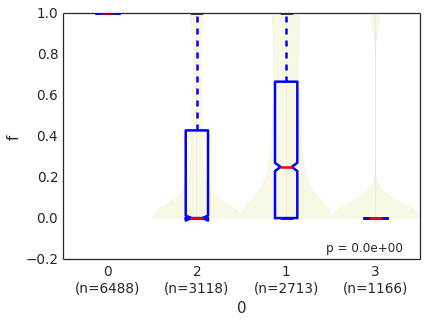

In [38]:
violin_plot_pandas(rr[0], rr.f)

In [39]:
f1 = (rr[[2,3]].sum(1) > 1)
f2 = rr[0].isin([1,2])

In [62]:
f3 = rr[2] / rr[[1,2,3]].sum(1)
f3 = f3[rr[0] == 0]

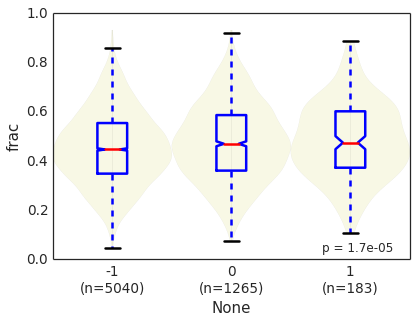

In [63]:
violin_plot_pandas(1.*(f3>.2) - 1.*(f3 < .8), Screen.dx_rna.frac, order=[-1,0,1])

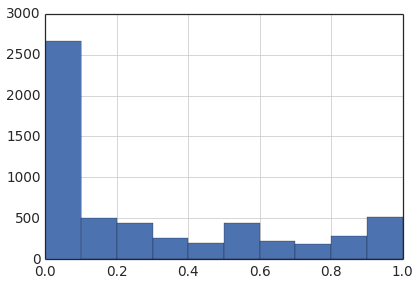

In [40]:
v = rr[f1 & f2]['f']
v.hist()